# Lesson 1 Notes: Analyzing Patient Data

These are some notes as I go through [Software Carpentry](https://software-carpentry.org/)'s tutorial [*Programming with Python*](http://swcarpentry.github.io/python-novice-inflammation/), which I plan to use as my teaching example for Instructor Training Checkout.  The web page for this lesson can be found [here](http://swcarpentry.github.io/python-novice-inflammation/01-numpy/).

## Setup

Check out the [Setup page](http://swcarpentry.github.io/python-novice-inflammation/setup/).  Get the data zip-file [here](http://swcarpentry.github.io/python-novice-inflammation/data/python-novice-inflammation-data.zip).

```bash
# go to a good workspace, like the desktop
> cd ~/Desktop

# make a folder for this project
> mkdir python-novice-inflammation

# put the data there
> mv data/ python-novice-inflammation

# descend into the folder
> cd python-novice-inflammation

# get a notebook running
> jupyter notebook
```

A [nice blog post](https://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/) about mixing languages within a Jupyter notebook.

## The Goal

> Import tabular data into Python.

## The Overarching Metaphors

| | **Basic Unit** | **Lives in...** | **Builds a...** |
| :-- | :-- | :-- | :-- |
| **Language** | word | sentence | story |
| **Science** | equipment | lab | experiment |
| **Programming** | function | library | program |

## Lab Equipment: Libraries

In [1]:
import numpy

## Getting Tools: .-Notation

In [2]:
numpy.loadtxt(fname='./data/inflammation-01.csv', delimiter=',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

Points:

* `[shift]` + `[enter]` to run the command (in the notebook)
* Function notation: `loadtext(...)`
    * Parameters: `fname=..., delimiter=...`
        * These variables take `string`s
* Dot notation: `numpy.loadtext(...)`
* Numerical notation: `1.` rather than `1.0`
* Nothing saved so far...
    * We didn't save the output

## Saving Data: Variables

Two analogies:

| | **Data** | **Variable** | **Interpretation** |
| :-- | :-- | :-- | :-- |
| **Sticky Note** | apple | post-it with label | label |
| **Bucket** | apple | basket with name | container |

In [3]:
# assignment
weight_kg = 55

In [4]:
# print value
print(weight_kg)

55


In [6]:
# muck around
# print separates with comma
print('weight in pounds: ', 2.2 * weight_kg)

weight in pounds:  121.00000000000001


In [7]:
# new value
weight_kg = 57.5
print('weight in kilograms is now:', weight_kg)

weight in kilograms is now: 57.5


Two viewpoints:

* we moved the sticky note to a new number, or
* we tossed out the old apple and put a different one in the basket

### The Variable Just Saves Data, Not Process

If we do a calculation and store the output, the calculation is forgotten.

In [8]:
# store that last value
weight_lb = 2.2 * weight_kg
print('weight in kilograms:', weight_kg, 'and in pounds:', weight_lb)

weight in kilograms: 57.5 and in pounds: 126.50000000000001


In [10]:
# change the weight in kg
weight_kg = 100.0
print('weight in kilograms is now:', weight_kg)

weight in kilograms is now: 100.0


In [11]:
# check weight in lbs again
print('and weight in pounds is still:', weight_lb)

and weight in pounds is still: 126.50000000000001


### Magic: Check out Who's Who in memory

In [12]:
%whos

Variable    Type      Data/Info
-------------------------------
numpy       module    <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
weight_kg   float     100.0
weight_lb   float     126.50000000000001


### Saving Data is Saving Data

In [14]:
# save a whole array if you want
data = numpy.loadtxt(fname='./data/inflammation-01.csv', delimiter=',')

In [15]:
print(data)

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


In [20]:
# get the type of the sticky note "data" itself
print(type(data))

<class 'numpy.ndarray'>


It's an "*n*-dimensional array".

That makes sense:

* rows: patients
* columns: arthritis inflammation measurements

What do the measurements look like?

### Data Has *Attributes*

Metaphors:

| | **Thing** | **Descriptor** |
| :-- | :-- | :-- |
| **Language** | noun | adjective |
| **Programming** | data | attribute |

In [21]:
# get type of the data *entries*
print(data.dtype) # note the attribute notation with the dot

float64


How many patients and measurements?

In [22]:
# what's the shape of my array (rows, columns)?
print(data.shape)

(60, 40)


## Accessing Individual Elements: Indices

We use notation

> `variable[j, k]` to say "I want the element in the *j*th row, *k*th column."

But note:

* indices ***start at 0!***
    * So the *1st* row has **index `0`**
    * So the *5th* row has **index `4`**
    * So the *60th* row has **index `59`**

In [23]:
# first data value
print('first value in data:', data[0, 0])

first value in data: 0.0


In [24]:
# middle data value
print('middle value in data:', data[30, 20])

middle value in data: 13.0


## Accessing Ranges: Slicing

We use notation

> `[a:b]` to say "I want elements starting at index `a` and up to -- ***but not including*** -- index `b`."

In [25]:
# give me the first row, all elements up to but not including the 10th column
print(data[0, 0:10])

[ 0.  0.  1.  3.  1.  2.  4.  7.  8.  3.]


In [26]:
# give me the first 4 patients, with their 1st 10 measurements
print(data[0:4, 0:10])

[[ 0.  0.  1.  3.  1.  2.  4.  7.  8.  3.]
 [ 0.  1.  2.  1.  2.  1.  3.  2.  2.  6.]
 [ 0.  1.  1.  3.  3.  2.  6.  2.  5.  9.]
 [ 0.  0.  2.  0.  4.  2.  2.  1.  6.  7.]]


In [27]:
# give me the next 6 patients, same measurements
print(data[4:10, 0:10])

[[ 0.  1.  1.  3.  3.  1.  3.  5.  2.  4.]
 [ 0.  0.  1.  2.  2.  4.  2.  1.  6.  4.]
 [ 0.  0.  2.  2.  4.  2.  2.  5.  5.  8.]
 [ 0.  0.  1.  2.  3.  1.  2.  3.  5.  3.]
 [ 0.  0.  0.  3.  1.  5.  6.  5.  5.  8.]
 [ 0.  1.  1.  2.  1.  3.  5.  3.  5.  8.]]


In [28]:
# give me the same patients, but all measurements after the 34th
print(data[4:10, 35:]) # no end for slice says "go all the way!"

[[ 4.  2.  0.  1.  1.]
 [ 4.  4.  3.  2.  1.]
 [ 5.  4.  1.  1.  1.]
 [ 5.  3.  2.  2.  1.]
 [ 3.  2.  1.  0.  0.]
 [ 4.  1.  2.  0.  0.]]


In [29]:
# give me the 1st 10 patients
# measurements after the 35th
# save in a variable
small = data[:10, 35:]
# no start point for slice says "start from the beginning"
print('small is:')
print(small)

small is:
[[ 4.  2.  3.  0.  0.]
 [ 5.  1.  1.  0.  1.]
 [ 3.  2.  2.  1.  1.]
 [ 4.  2.  3.  2.  1.]
 [ 4.  2.  0.  1.  1.]
 [ 4.  4.  3.  2.  1.]
 [ 5.  4.  1.  1.  1.]
 [ 5.  3.  2.  2.  1.]
 [ 3.  2.  1.  0.  0.]
 [ 4.  1.  2.  0.  0.]]


## Working with Data: Element Operations

Simple operations (add, subtract, multiply, divide) generally apply element by element.

In [30]:
# double each element
doubledata = data * 2.0

In [32]:
# take a piece to look at the result
print('original:')
print(data[:3, 36:])
print('doubledata:')
print(doubledata[:3, 36:])

original:
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]
doubledata:
[[ 4.  6.  0.  0.]
 [ 2.  2.  0.  2.]
 [ 4.  4.  2.  2.]]


In [33]:
# adding
tripledata = doubledata + data

In [34]:
# each entry x of data has become 2*x + x, so 3*x
print('tripledata:')
print(tripledata[:3, 36:])

tripledata:
[[ 6.  9.  0.  0.]
 [ 3.  3.  0.  3.]
 [ 6.  6.  3.  3.]]


### Fancy Stuff: NumPy Knows What to Do

With the mean, or average, of your data, NumPy knows it should gobble all the data and spit out a number.

In [35]:
print(numpy.mean(data))

6.14875


We can get a whole bunch of information at once for our data using convenient functions.

In [36]:
# Look!  Multiple assignment!
maxval, minval, stdval = numpy.max(data), numpy.min(data), numpy.std(data)

print('maximum inflammation:', maxval)
print('minimum inflammation:', minval)
print('standard deviation:', stdval)

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.61383319712


#### Caveat: Functions with No Input

Some functions don't take input.  ***Don't forget the parentheses!***

In [37]:
import time
print(time.ctime())

Mon Nov 21 15:52:18 2016


## Working with Data: Grouping Elements

In [38]:
# Find max inflammation of 1st patient
patient_0 = data[0, :] # row 0, all columns
print('maximum inflammation for patient 0: ', patient_0.max())

maximum inflammation for patient 0:  18.0


Skip the variable if you don't need to save it for later.

In [39]:
print('maximum inflammation for patient 2: ', data[2, :].max())

maximum inflammation for patient 2:  19.0


### Task: Column Average

We want the average inflammation for each day.

* A day corresponds to a **column** in the data;
* Operations along a column use `axis = 0`.

In [40]:
print(numpy.mean(data, axis=0))

[  0.           0.45         1.11666667   1.75         2.43333333   3.15
   3.8          3.88333333   5.23333333   5.51666667   5.95         5.9
   8.35         7.73333333   8.36666667   9.5          9.58333333
  10.63333333  11.56666667  12.35        13.25        11.96666667
  11.03333333  10.16666667  10.           8.66666667   9.15         7.25
   7.33333333   6.58333333   6.06666667   5.95         5.11666667   3.6
   3.3          3.56666667   2.48333333   1.5          1.13333333
   0.56666667]


In [41]:
# sanity check: shape
print(numpy.mean(data, axis=0).shape)

(40,)


That is, the thing we're left with has 40 rows (the 40 measurements per patient) and no (other) columns.  It's a single value for each of the 40 days.

### Task: Row Maximum

We want to find the maximum inflammation for each patient.

* A patient corresponds to a **row**;
* Operations along rows use `axis = 1`.

In [42]:
print(numpy.max(data, axis=1))

[ 18.  18.  19.  17.  17.  18.  17.  20.  17.  18.  18.  18.  17.  16.  17.
  18.  19.  19.  17.  19.  19.  16.  17.  15.  17.  17.  18.  17.  20.  17.
  16.  19.  15.  15.  19.  17.  16.  17.  19.  16.  18.  19.  16.  19.  18.
  16.  19.  15.  16.  18.  14.  20.  17.  15.  17.  16.  17.  19.  18.  18.]


In [44]:
# sanity check: shape
print(numpy.max(data, axis=1).shape)

(60,)


A bit of data for each of 60 patients.  Sounds right.

## Insight via Visualization

How can we visualize the data?

A standard package (library) is `matplotlib`.

We'll use a part (module) of the library called `pyplot`.

/Users/bobtodd/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/bobtodd/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


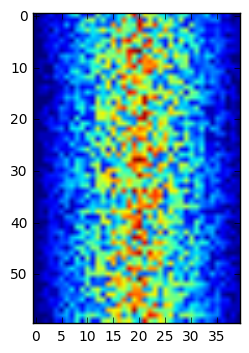

In [45]:
# heat map
import matplotlib.pyplot
image = matplotlib.pyplot.imshow(data)
matplotlib.pyplot.show()

### Magic: Inline images

To get this to show up, you may need to execute the following command...

In [47]:
# you only have to do this once in the notebook
% matplotlib inline

### Task: Plot Average Inflammation for Each Day

We need to take the average for each day, i.e. for each column: `axis = 0`.

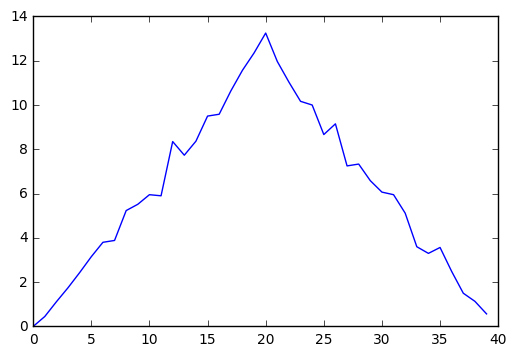

In [48]:
avg_inflammation = numpy.mean(data, axis=0)
avg_plot = matplotlib.pyplot.plot(avg_inflammation)
matplotlib.pyplot.show()

Suspicious: for arthritis, we'd expect

* sharp onset,
* gradual decrease.

Check the maximum.

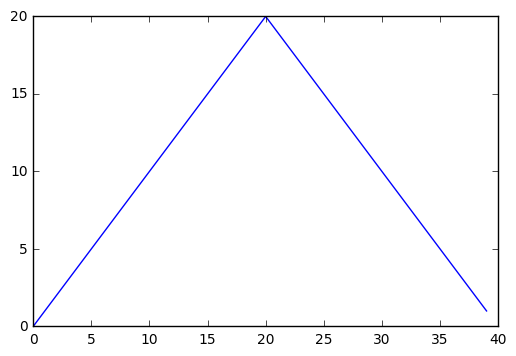

In [49]:
max_plot = matplotlib.pyplot.plot(numpy.max(data, axis=0))
matplotlib.pyplot.show()

That looks too perfect... something's wrong.

Try the minimum.

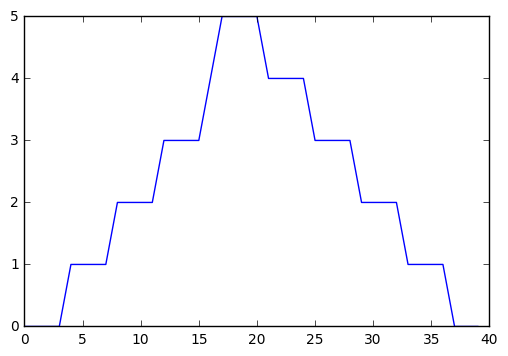

In [50]:
min_plot = matplotlib.pyplot.plot(numpy.min(data, axis=0))
matplotlib.pyplot.show()

A step function?  Very strange.

#### Packaging in a Single Figure

We can put all this together in a single figure with subfigures.

The elements:

* `figure()`: creates a space to work
    * `figsize`: the size of the workspace
* `(axis1, axis2, axis3)`: variables to store subplots
* `figure.add_subplot(a, b, c)`: create subplot
    * `a`: total number of rows of subplots
    * `b`: total number of subplot columns
    * `c`: which subplot you're working on
        * this is determined in sequence
        * left to right, top to bottom
* `axis1.set_xlabel(), axis1.set_ylabel()`: give title to *x*- and *y*-axes

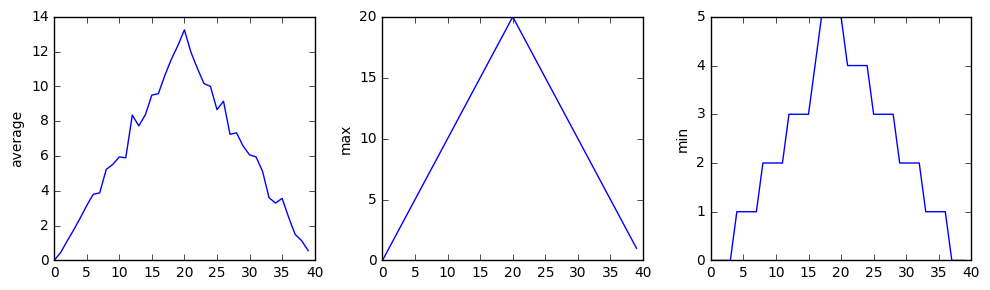

In [53]:
fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

axis1 = fig.add_subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
axis2 = fig.add_subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
axis3 = fig.add_subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot

# 1st plot: average
axis1.set_ylabel('average')
axis1.plot(numpy.mean(data, axis=0))

# 2nd plot: max
axis2.set_ylabel('max')
axis2.plot(numpy.max(data, axis=0))

# 3rd plot: min
axis3.set_ylabel('min')
axis3.plot(numpy.min(data, axis=0))

# adjust spacing to *prevent* a squooshed layout
fig.tight_layout()

# show the result
matplotlib.pyplot.show()